# Week 8 Practice

## Black-Scholes Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

###  European Options

Non-Dividend Paying Options

In [2]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [3]:
euro_option_bs(100, 100, 1, 0.05, 0.25, 'call')

12.335998930368717

In [4]:
S = np.linspace(50,150,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.05, 0.25, 'call')

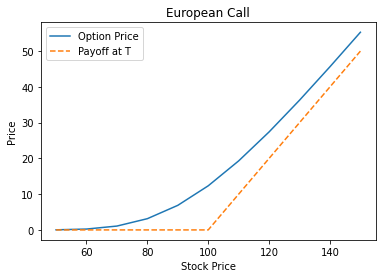

In [5]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Dividend Paying Options

In [6]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [7]:
euro_option_bsm(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [8]:
T = np.linspace(0.25,3,12)
cpd = np.zeros((len(T),1))
for i in range(len(T)):
    cpd [i] = euro_option_bsm(100, 100, T[i], 0.05, 0.03, 0.25, 'call')

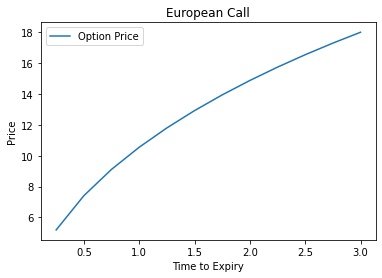

In [9]:
fig = plt.figure()
plt.plot(T, cpd, '-')
plt.xlabel('Time to Expiry')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price'])

### Option Trading

Has Black Scholes correctly predicted the market value of the options?

In [10]:
AAPL = yf.Ticker('AAPL')
opt = AAPL.option_chain('2021-12-10')
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,74.50,75.15,73.100000,NaN,NaN,30,1.156254,True,REGULAR,USD
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,64.55,65.15,62.850000,NaN,2.0,0,0.964844,True,REGULAR,USD
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,59.55,60.15,59.650000,NaN,2.0,0,0.876954,True,REGULAR,USD
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,54.55,55.15,0.000000,0.000000,10.0,90,0.793947,True,REGULAR,USD
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,49.55,50.15,49.750000,NaN,2.0,0,0.714847,True,REGULAR,USD
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,39.60,40.20,39.170000,0.000000,NaN,10,0.589848,True,REGULAR,USD
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,34.60,35.20,0.000000,0.000000,2.0,0,0.516606,True,REGULAR,USD
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,30.10,30.25,-1.269999,-4.346334,1.0,10,0.462896,True,REGULAR,USD
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,24.70,25.75,0.120001,0.509558,1.0,3,0.497075,True,REGULAR,USD
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,20.25,20.40,0.000000,0.000000,1.0,103,0.354499,True,REGULAR,USD


In [11]:
data = yf.download("AAPL", start="2020-11-13", end="2021-11-13")

[*********************100%***********************]  1 of 1 completed


In [12]:
data['Adj Close']

Date
2020-11-13    118.529305
2020-11-16    119.562920
2020-11-17    118.658493
2020-11-18    117.306824
2020-11-19    117.913086
                 ...    
2021-11-08    150.440002
2021-11-09    150.809998
2021-11-10    147.919998
2021-11-11    147.869995
2021-11-12    149.990005
Name: Adj Close, Length: 252, dtype: float64

In [13]:
S = data['Adj Close'][-1]
K = opt.calls['strike']
T = 4/52
r = 0.0158
q = 0.0059
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
vol = np.sqrt(252) * log_return.std() 
vol

0.24729793841130934

In [14]:
AAPL_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_bsm_call [i] = euro_option_bsm(S, K[i], T, r, q, vol, 'call')

In [15]:
opt.calls['BSMPrice'] = pd.DataFrame(AAPL_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,74.50,75.15,73.100000,NaN,NaN,30,1.156254,True,REGULAR,USD,75.01
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,64.55,65.15,62.850000,NaN,2.0,0,0.964844,True,REGULAR,USD,65.03
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,59.55,60.15,59.650000,NaN,2.0,0,0.876954,True,REGULAR,USD,60.03
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,54.55,55.15,0.000000,0.000000,10.0,90,0.793947,True,REGULAR,USD,55.04
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,49.55,50.15,49.750000,NaN,2.0,0,0.714847,True,REGULAR,USD,50.04
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,39.60,40.20,39.170000,0.000000,NaN,10,0.589848,True,REGULAR,USD,40.06
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,34.60,35.20,0.000000,0.000000,2.0,0,0.516606,True,REGULAR,USD,35.06
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,30.10,30.25,-1.269999,-4.346334,1.0,10,0.462896,True,REGULAR,USD,30.07
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,24.70,25.75,0.120001,0.509558,1.0,3,0.497075,True,REGULAR,USD,25.08
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,20.25,20.40,0.000000,0.000000,1.0,103,0.354499,True,REGULAR,USD,20.14


In [16]:
opt.calls['estimate_error'] = ((opt.calls['lastPrice'] - opt.calls['BSMPrice'])/opt.calls['BSMPrice'])*100
opt.calls['estimate_error']

0      -2.546327
1      -3.352299
2      -0.633017
3       0.526890
4      -0.579536
5      -2.221667
6      -0.456361
7      -7.050216
8      -5.622010
9      -8.987090
10     -7.431551
11     -9.357653
12     -1.022147
13      1.469238
14     -1.191658
15     -4.633621
16     -1.292597
17     -2.313625
18     -4.661017
19     -6.542056
20    -10.344828
21    -11.324376
22    -13.733906
23    -15.662651
24    -26.728111
25    -32.673267
26    -14.634146
27     13.333333
28    100.000000
29    600.000000
30           inf
31           inf
32           inf
33           inf
34           inf
Name: estimate_error, dtype: float64

In [17]:
opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     30.000000
mean      17.344458
std      112.072107
min      -32.673267
25%       -9.265012
50%       -3.992960
75%       -0.730299
max      600.000000
Name: estimate_error, dtype: float64

Our mean estimation error is 17.34%, with a standard deviation of 112.67% points. Our median is even more promising at around -3.99%. Our standard deviation still seems a bit high.

Text(0.5, 1.0, 'Histogram of Estimate Error')

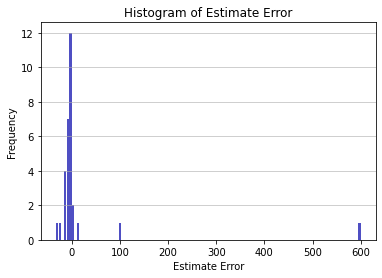

In [18]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

### Mibian - Options Pricing Library

MibianLib is an open source python library for options pricing. You can use it to calculate the price, the implied volatility, the greeks or the put/call parity of an option using the Black-Scholes(-Merton) pricing models.

In [19]:
pip install mibian

Note: you may need to restart the kernel to use updated packages.


In [20]:
import mibian as mb

In [21]:
option_100 = mb.BS([S, 100, r*100, 30], volatility = vol*100)

# Used for pricing European options on stocks without dividends 
# BS([underlyingPrice, strikePrice, interestRate, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [22]:
option_100.callPrice

50.11978422826341

In [23]:
option_100d = mb.Me([S, 100, r*100, q*100, 30], volatility = vol*100)

# Used for pricing European options on stocks with dividends
# Me([underlyingPrice, strikePrice, interestRate, annualDividends, daysToExpiration], volatility=x, callPrice=y, putPrice=z)

In [24]:
option_100d.callPrice

50.07129891606765

In [25]:
AAPL_mb_bsm_call = np.zeros((len(K),1))
for i in range(len(K)):
    AAPL_mb_bsm_call [i] = mb.Me([S, K[i], r*100, q*100, 30], volatility = vol*100).callPrice

In [26]:
opt.calls['MB_BSMPrice'] = pd.DataFrame(AAPL_mb_bsm_call).round(2)
opt.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,BSMPrice,estimate_error,MB_BSMPrice
0,AAPL211210C00075000,2021-11-10 20:49:53,75.0,73.10,74.50,75.15,73.100000,NaN,NaN,30,1.156254,True,REGULAR,USD,75.01,-2.546327,75.04
1,AAPL211210C00085000,2021-11-12 15:10:52,85.0,62.85,64.55,65.15,62.850000,NaN,2.0,0,0.964844,True,REGULAR,USD,65.03,-3.352299,65.05
2,AAPL211210C00090000,2021-11-12 18:11:08,90.0,59.65,59.55,60.15,59.650000,NaN,2.0,0,0.876954,True,REGULAR,USD,60.03,-0.633017,60.06
3,AAPL211210C00095000,2021-11-08 17:03:19,95.0,55.33,54.55,55.15,0.000000,0.000000,10.0,90,0.793947,True,REGULAR,USD,55.04,0.526890,55.06
4,AAPL211210C00100000,2021-11-12 17:51:24,100.0,49.75,49.55,50.15,49.750000,NaN,2.0,0,0.714847,True,REGULAR,USD,50.04,-0.579536,50.07
5,AAPL211210C00110000,2021-11-10 15:52:24,110.0,39.17,39.60,40.20,39.170000,0.000000,NaN,10,0.589848,True,REGULAR,USD,40.06,-2.221667,40.08
6,AAPL211210C00115000,2021-10-29 19:57:06,115.0,34.90,34.60,35.20,0.000000,0.000000,2.0,0,0.516606,True,REGULAR,USD,35.06,-0.456361,35.09
7,AAPL211210C00120000,2021-11-12 14:43:31,120.0,27.95,30.10,30.25,-1.269999,-4.346334,1.0,10,0.462896,True,REGULAR,USD,30.07,-7.050216,30.10
8,AAPL211210C00125000,2021-11-12 15:42:29,125.0,23.67,24.70,25.75,0.120001,0.509558,1.0,3,0.497075,True,REGULAR,USD,25.08,-5.622010,25.12
9,AAPL211210C00130000,2021-11-11 18:04:46,130.0,18.33,20.25,20.40,0.000000,0.000000,1.0,103,0.354499,True,REGULAR,USD,20.14,-8.987090,20.19


In [27]:
opt.calls['estimate_error_mb'] = ((opt.calls['lastPrice'] - opt.calls['MB_BSMPrice'])/opt.calls['MB_BSMPrice'])*100
opt.calls['estimate_error_mb']

0      -2.585288
1      -3.382014
2      -0.682651
3       0.490374
4      -0.639105
5      -2.270459
6      -0.541465
7      -7.142857
8      -5.772293
9      -9.212481
10     -7.852044
11    -10.070810
12     -1.858108
13      0.454545
14     -2.355250
15     -5.851064
16     -2.777778
17     -4.040404
18     -6.509695
19     -8.675799
20    -12.605042
21    -13.805970
22    -16.597510
23    -18.793503
24    -31.168831
25    -38.738739
26    -25.531915
27     -5.555556
28     66.666667
29    250.000000
30    500.000000
31           inf
32           inf
33           inf
34           inf
Name: estimate_error_mb, dtype: float64

In [28]:
opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0).describe()

count     31.000000
mean      18.470805
std      101.823924
min      -38.738739
25%       -9.641646
50%       -5.555556
75%       -1.270379
max      500.000000
Name: estimate_error_mb, dtype: float64

Text(0.5, 1.0, 'Histogram of Estimate Error')

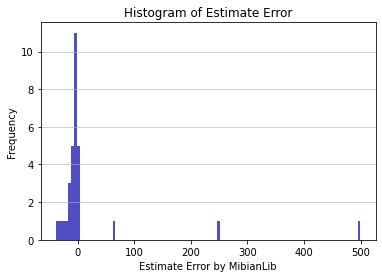

In [29]:
n, bins, patches = plt.hist(x=opt.calls['estimate_error_mb'].replace([np.inf, -np.inf], np.nan).dropna(axis=0), bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Estimate Error by MibianLib')
plt.ylabel('Frequency')
plt.title('Histogram of Estimate Error')

Although the mean and median estimation of error have increased, the standard deviation has decreased. Overall, the results is consistent.